## Luis Omar Leyva Navarrete - A01570367

# Instrucciones
### Dado:

* Habitación de MxN espacios.
* Número de agentes.
* Porcentaje de celdas inicialmente sucias.
* Tiempo máximo de ejecución.

### Realiza la siguiente simulación:
* Inicializa las celdas sucias (ubicaciones aleatorias).
* Todos los agentes empiezan en la celda [1,1].
* En cada paso de tiempo:
  * Si la celda está sucia, entonces aspira.
  * Si la celda está limpia, el agente elije una dirección aleatoria para moverse (unas de las 8 celdas vecinas) y elije la acción de movimiento (si no puede moverse allí, permanecerá en la misma celda).
* Se ejecuta el tiempo máximo establecido.

### Deberás recopilar la siguiente información durante la ejecución:
* Tiempo necesario hasta que todas las celdas estén limpias (o se haya llegado al tiempo máximo).
* Porcentaje de celdas limpias después del termino de la simulación.
* Número de movimientos realizados por todos los agentes.
* Analiza cómo la cantidad de agentes impacta el tiempo dedicado, así como la cantidad de movimientos realizados. Desarrollar un informe con lo observado.

## Imports
Se utilizaran los siguientes paquetes de python
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para instalar mesa hay que hay que utilizar el siguiente comando:

In [1]:
!pip install mesa

Ahora importamos las librerias y funciones a utilizar.

In [2]:
# Importamos las clases para manejar el modelo y agente.
from mesa import Agent, Model 

# Utilizamos Multigrid para poder manejar varios agentes.
from mesa.space import MultiGrid

# Activamos a todos los agentes a la vez.
from mesa.time import RandomActivation

# Obtenemos la información completa del grid para poder graficarlo.
from mesa.datacollection import DataCollector

# Esta libreria se utilizara en conjunto con data collector para graficar el grid.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Librerias para manejar operaciones numericas.
import numpy as np
import pandas as pd
import random
# librerias para obtener el tiempo de ejecucion.
import time
import datetime

## Crear el modelo

In [3]:
def obtener_habitacion(model):
    habitacion = np.zeros((model.grid.width, model.grid.height))
    for celda in model.grid.coord_iter():
        contenido_celda, x, y = celda
        for contenido in contenido_celda:
            if isinstance(contenido, Aspiradora):
                habitacion[x][y] = 2
            else:
                habitacion[x][y] = contenido.estado
    return habitacion

class Aspiradora(Agent):
    '''
    Agente Aspiradira que limpia el suelo
    '''
    def __init__(self,unique_id,model):
        super().__init__(unique_id, model)
        self.estado = 3 # Estado de aspiradora

    '''
    Moviemto
    '''
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
    
    '''
    Metodo para activar el movimiento y impiar el suelo
    '''

    def limpiarPiso(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            for mate in cellmates:
                if mate.estado == 1:
                    mate.estado = 0
                    self.model.restante -= 1

    def step(self):
        self.limpiarPiso()
        self.move()

class Suciedad(Agent):
    '''
    Agente de suciedad
    '''
    def __init__(self,unique_id,model):
        super().__init__(unique_id, model)
        self.estado = 1 #Decimos que esta sucio

    def step(self):
        if self.estado == 0:
            self.model.grid._remove_agent(self.pos, self)
            self.model.schedule.remove(self)


class LimpiezaModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, M, width, height):
        self.aspiradoras = N
        self.suciedades = M
        self.restante = M
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.aspiradoras):
            a = Aspiradora(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        for i in range(self.suciedades):
            a = Suciedad(i+M, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    # Aquí definimos con colector para obtener el grid completo.
        self.datacollector = DataCollector(
            model_reporters={"Grid": obtener_habitacion})
    
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

## Tiempo de ejecucion

In [4]:
# Definimos el tamaño del Grid
GRID_SIZE = 10

# Definimos el tiempo maximo del modelo
MAX_TIME = 0.01

#Definimos la cantidad de celdas sucias
CELDAS_SUCIAS = 40

#definimos la cantidad de aspiradoras
ASPIRADORAS = 5

start_time = time.time()
step_num = 0
restantes = CELDAS_SUCIAS
modelo = LimpiezaModel(ASPIRADORAS, CELDAS_SUCIAS, GRID_SIZE, GRID_SIZE)
while time.time()-start_time <= MAX_TIME:
    modelo.step()
    step_num += 1
    if modelo.restante < 1:
        break
final_time = time.time()


## Graficar

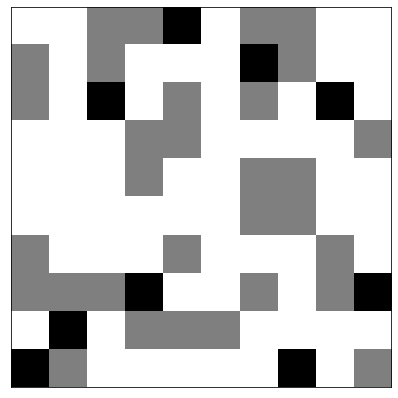

In [5]:
all_grid = modelo.datacollector.get_model_vars_dataframe()

# %%capture

fig, axs = plt.subplots(figsize=(7,7))
axs.set_xticks([])
axs.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.binary)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])
    
anim = animation.FuncAnimation(fig, animate, frames=step_num)

In [6]:
anim

## Resultados
Deberás recopilar la siguiente información durante la ejecución:

* Tiempo necesario hasta que todas las celdas estén limpias (o se haya llegado al tiempo máximo).
* Porcentaje de celdas limpias después del termino de la simulación.
* Número de movimientos realizados por todos los agentes.

In [7]:
#Imprimimos el tiempo de ejecucion
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(final_time - start_time))))

#Porcentaje de celdas limpias al inicio y final. (El porcentaje se calcula entorno a las celdas sucias totales en comparacion con las limpias. Tambien se despliega el porcentaje de suciedad inicial)
print('Porcentaje inicial de suciedad:', str((CELDAS_SUCIAS / (GRID_SIZE * GRID_SIZE)) * 100), '%')
print('Porcentaje final de suciedad:', str((modelo.restante / (GRID_SIZE * GRID_SIZE)) * 100), '%')

#numero de movimientos o steps
print('Cantidad de movimientos:', step_num)

Tiempo de ejecución: 0:00:00.009002
Porcentaje inicial de suciedad: 40.0 %
Porcentaje final de suciedad: 0.0 %
Cantidad de movimientos: 68


## Analisis

La cantidad de agentes afecta el tiempo de ejecucion del modelo, pero dependiendo del tipo de agente el tiempo aumenta o disminuye. En este caso al aumentar los agentes de aspiradora el tiempo disminuye exponencialmente debido a que cubren mas espacio. Mientras que aumentar el piso sucio siempre aumenta la cantidad de tiempo necesario para la ejecucion. Aunque el aumento de tiempo no se puede determinar especificamente debido a que el movimiento de la aspiradora es aleatoria.